In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

загрузка данных Диабет

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=names)

Анализ данных

In [3]:
corr = data[data.columns].corr()
corr

# Наибольшая, но недостаточная корреляция с полем Glucose. При этом некоторые поля коррелируют между собой, но слабо

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


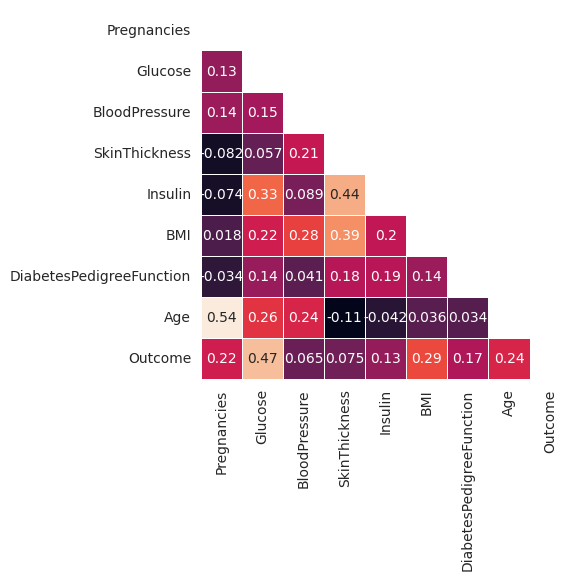

In [4]:
import seaborn as sns
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

Разделение данных

In [5]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Логистическая регрессия

In [6]:
# 4a. Логистическая регрессия
from sklearn.linear_model import LogisticRegression
log_regress = LogisticRegression(random_state=0)
log_regress.fit(x_train, y_train)
test_predictions = log_regress.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_predictions)
print(" Accuracy:",metrics.accuracy_score (y_test, test_predictions))
cnf_matrix

 Accuracy: 0.7792207792207793


/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[141,  16],
       [ 35,  39]])

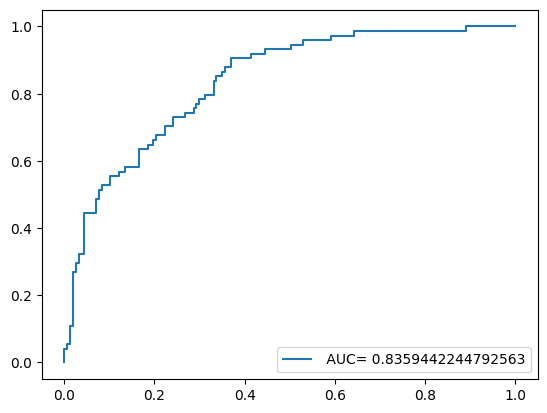

In [7]:
test_predictions_proba = log_regress.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, test_predictions_proba)
auc = metrics.roc_auc_score (y_test, test_predictions_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

In [8]:
# 4b. Логистическая регрессия с балансом классов
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0:class_weights[0], 1: class_weights[1] }
class_weights_dict
log_regress = LogisticRegression(solver='newton-cg', class_weight=class_weights_dict)
log_regress.fit(x_train, y_train)
test_predictions = log_regress.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_predictions)
print(" Accuracy:",metrics.accuracy_score (y_test, test_predictions))
print (metrics.classification_report(y_test, test_predictions))
print (cnf_matrix)



 Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       157
           1       0.60      0.68      0.64        74

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.76      0.75      0.76       231

[[124  33]
 [ 24  50]]


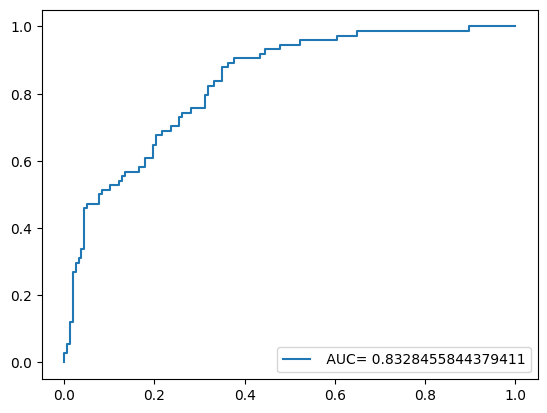

In [9]:
test_predictions_proba = log_regress.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, test_predictions_proba)
auc = metrics.roc_auc_score (y_test, test_predictions_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

In [10]:
y_train.shape

(537,)

In [11]:
import numpy as np

def sigmoid(k):
    return 1 / (1 + np.exp(-k))

# Определение входных данных и весов
#X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
#y = np.array([[0, 1, 1, 0]]).T
X = np.array(x_train)
y = np.array([y_train]).T
np.random.seed(1)

# Случайная инициализация весов
weights_0 = 2 * np.random.random((8, 537)) - 1
weights_1 = 2 * np.random.random((537,1)) - 1


# Прямое распространение
for i in range(1000):
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0, weights_0))
    layer_2 = sigmoid(np.dot(layer_1, weights_1))
    # Ошибка и дельта для последнего слоя
    layer_2_error = y - layer_2
    layer_2_delta = layer_2_error * (layer_2 * (1 - layer_2))

    # Обратное распространение ошибки и вычисление дельты для первого слоя
    layer_1_error = layer_2_delta.dot(weights_1.T)
    layer_1_delta = layer_1_error * (layer_1 * (1 - layer_1))

    # Обновление весов
    weights_1 += layer_1.T.dot(layer_2_delta)
    weights_0 += layer_0.T.dot(layer_1_delta)

print("Выходные данные после обучения:")
print(layer_2)

/tmp/ipykernel_579586/1243792629.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k))


Выходные данные после обучения:
[[0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [6.75516275e-285]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [3.67156990e-297]
 [3.19253277e-281]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [3.15545485e-256]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [8.05887163e-281]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [7.69141175e-284]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]

In [12]:
import numpy as np

def sigmoid(x):
    return x# np.maximum(0, x)#np.tanh(x)#1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)


class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],537) 
        self.weights2   = np.random.rand(537,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
#X = np.array([[0,0],[0,1],[1,0],[1,1]])
#y = np.array([[0],[1],[1],[0]])

X = np.array(x_train)
y = np.array([y_train]).T

nn = NeuralNetwork(X,y)

for i in range(1500):
    nn.feedforward()
    nn.backprop()

print(nn.output)

/tmp/ipykernel_579586/135314257.py:7: RuntimeWarning: overflow encountered in multiply
  return x * (1.0 - x)


[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]

In [13]:
print(np.average(nn.output))

nan


In [5]:
import tensorflow as tf;
print(tf.config.list_physical_devices('GPU'))

2023-08-02 12:12:39.110525: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 12:12:39.253006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 12:12:39.254473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 12:12:40.420860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[]


1. Увеличесние количества эпох до 20

In [6]:
from tensorflow import keras
import matplotlib.pyplot as plt

# Загрузим данные
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормализуем данные
train_images = train_images / 255.0
test_images = test_images / 255.0

# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, name='output')
])

In [16]:
# Компилируем модель
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Обучаем модель
model.fit(train_images, train_labels, epochs=20)

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/20


2023-08-01 16:54:01.421624: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4993 - accuracy: 0.8230
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3746 - accuracy: 0.8659
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.8771
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3141 - accuracy: 0.8840
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2948 - accuracy: 0.8912
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2810 - accuracy: 0.8965
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2689 - accuracy: 0.9000
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9035
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2479 - accuracy: 0.9076
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2397 - accurac

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.save("my_model")
model_restore = tf.saved_model.load("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


2. Увеличение количества нейронов в скрятом слое до 256

In [19]:
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Обучаем модель
model.fit(train_images, train_labels, epochs=10)

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10


2023-08-01 16:56:01.346305: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4795 - accuracy: 0.8295
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3642 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3264 - accuracy: 0.8800
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3014 - accuracy: 0.8896
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2842 - accuracy: 0.8942
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2696 - accuracy: 0.8993
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2562 - accuracy: 0.9050
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9074
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2360 - accuracy: 0.9117
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2265 - accurac

3. Добавление слоя

In [20]:
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Обучаем модель
model.fit(train_images, train_labels, epochs=10)

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10


2023-08-01 16:57:15.887587: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4882 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3638 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3323 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3081 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2899 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2744 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2629 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2508 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2398 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2286 - accurac

4. Скрытый слой sigmoid

In [21]:
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Обучаем модель
model.fit(train_images, train_labels, epochs=10)

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10


2023-08-01 16:58:22.200330: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5419 - accuracy: 0.8141
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3918 - accuracy: 0.8586
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3556 - accuracy: 0.8719
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3297 - accuracy: 0.8800
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.8854
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2968 - accuracy: 0.8909
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2842 - accuracy: 0.8955
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2723 - accuracy: 0.9010
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2626 - accuracy: 0.9036
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2527 - accurac

5. Замена Adam на RMSprop

In [5]:
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Обучаем модель
model.fit(train_images, train_labels, epochs=10)

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10


2023-08-01 17:01:56.153252: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5017 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3736 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3434 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3243 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3110 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3000 - accuracy: 0.8939
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2898 - accuracy: 0.8971
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2836 - accuracy: 0.9010
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2799 - accuracy: 0.9023
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2717 - accurac

6. Использование Dropout

In [ ]:
%load_ext tensorboard

In [9]:
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Обучаем модель
model.fit(train_images, train_labels, epochs=10)

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10


2023-08-01 17:11:56.106795: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5533 - accuracy: 0.8051
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4316 - accuracy: 0.8478
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4063 - accuracy: 0.8575
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3931 - accuracy: 0.8658
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3864 - accuracy: 0.8682
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3840 - accuracy: 0.8706
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3768 - accuracy: 0.8732
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3742 - accuracy: 0.8744
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3713 - accuracy: 0.8774
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3712 - accurac

6. BatchNormalization
наблюдение: перед функцией активации нормализация даёт лучший результат, хотя работает медленнее

In [1]:
%load_ext tensorboard

In [2]:
import datetime

In [3]:
rm -rf ./logs/

In [10]:
import datetime
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# Обучаем модель
model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4800 - accuracy: 0.8324
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3738 - accuracy: 0.8686
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3419 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3282 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3161 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3073 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2977 - accuracy: 0.8969
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2890 - accuracy: 0.9015
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2859 - accuracy: 0.9025
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.280

In [11]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6122), started 0:03:46 ago. (Use '!kill 6122' to kill it.)

7. initializers.HeNormal()

In [16]:
rm -rf ./logs/

In [17]:
import datetime
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# Обучаем модель
model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5036 - accuracy: 0.8200
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3432 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3252 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3130 - accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3032 - accuracy: 0.8942
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2911 - accuracy: 0.8964
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2851 - accuracy: 0.8995
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.9010
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.274

In [18]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6122), started 0:20:25 ago. (Use '!kill 6122' to kill it.)

8. glorot_uniform
точность выше, чем he_normal

In [ ]:
rm -rf ./logs/

In [19]:
import datetime
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.glorot_uniform()),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# Обучаем модель
model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5004 - accuracy: 0.8204
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3742 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3435 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3252 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3116 - accuracy: 0.8893
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3004 - accuracy: 0.8935
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - accuracy: 0.8977
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9008
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2783 - accuracy: 0.9018
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.271

In [20]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6122), started 0:23:20 ago. (Use '!kill 6122' to kill it.)

9. регуляризация l1

In [22]:
rm -rf ./logs/

In [24]:
import datetime
from tensorflow.keras.regularizers import l1, l2
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# Обучаем модель
model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2411 - accuracy: 0.7701
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8365 - accuracy: 0.7975
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7764 - accuracy: 0.8098
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7388 - accuracy: 0.8182
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7179 - accuracy: 0.8207
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7012 - accuracy: 0.8234
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6860 - accuracy: 0.8277
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6733 - accuracy: 0.8292
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6663 - accuracy: 0.8302
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.659

In [25]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6122), started 0:32:25 ago. (Use '!kill 6122' to kill it.)

10. регуляризация l2

In [26]:
import datetime
from tensorflow.keras.regularizers import l1, l2
# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# Обучаем модель
model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6455 - accuracy: 0.8136
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5039 - accuracy: 0.8446
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4725 - accuracy: 0.8536
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4567 - accuracy: 0.8567
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4453 - accuracy: 0.8605
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4359 - accuracy: 0.8625
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4311 - accuracy: 0.8660
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4251 - accuracy: 0.8668
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4258 - accuracy: 0.8666
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.424

In [27]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6122), started 0:34:47 ago. (Use '!kill 6122' to kill it.)

- Попробуйте различные расписания скорости обучения (например, экспоненциальное уменьшение) и сравните результаты.

11. Расписание

In [28]:
rm -rf ./logs/

In [29]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.1,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Создаем модель
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu',),
    keras.layers.Dense(10, name='output')
])
# Компилируем модель

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# Обучаем модель
model.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback])

# Оценим точность модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТестовая точность:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5374 - accuracy: 0.8082
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4002 - accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3622 - accuracy: 0.8670
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3376 - accuracy: 0.8756
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3192 - accuracy: 0.8832
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3066 - accuracy: 0.8869
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2925 - accuracy: 0.8920
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2818 - accuracy: 0.8935
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.8985
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.264

In [30]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6122), started 1:00:44 ago. (Use '!kill 6122' to kill it.)